In [40]:
import numpy as np
from network import Network
import matplotlib.pyplot as plt
import matplotlib.animation as animation


## Ejercicio 1

In [41]:
def plot(dataset, network):
    X = [x[0][0] for x in dataset]
    Y = [x[0][1] for x in dataset]
    c = [x[1][0] for x in dataset]

    plt.scatter(X, Y, c=c,  cmap="coolwarm")

    m, a, b = network.w[-1][0]  # mx + ay + b = 0

    x = np.linspace(-2, 2, 100)
    y = (-m*x - b)/a
    plt.plot(x, y)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()


### 1.a

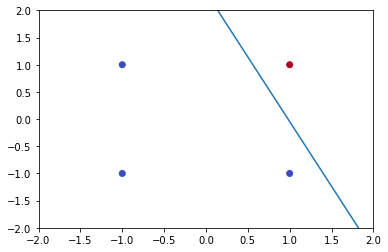

In [42]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [-1]],
    [[1, -1], [-1]],
    [[1, 1], [1]]
]

network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset)

plt.figure("AND")
plot(dataset, network)


#### animation

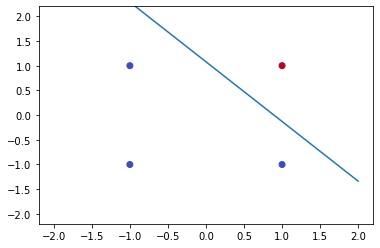

In [43]:
plt.figure("AND animation")
data = []
x = np.linspace(-2, 2, 100)
line, = plt.plot(x, x)
X = [x[0][0] for x in dataset]
Y = [x[0][1] for x in dataset]
c = [x[1][0] for x in dataset]
plt.scatter(X, Y, c=c, cmap="coolwarm")


def callback(network):
    m, a, b = network.w[-1][0]  # mx + ay + b = 0
    data.append((m, a, b))


def update(frame):
    m, a, b = data[frame]
    y = (-m*x - b)/a
    line.set_ydata(y)
    return line


network = Network(structure=([2, 1]), activation='tanh', seed=17)

network.train(dataset, epochs=100, callback=callback, learning_rate=0.01)
anim = animation.FuncAnimation(
    plt.gcf(), update, frames=len(data)-1, interval=60)

anim.save('ej1.a.mp4', writer='imagemagick')

anim = []

update(len(data)-1)

plt.show()


### 1.b

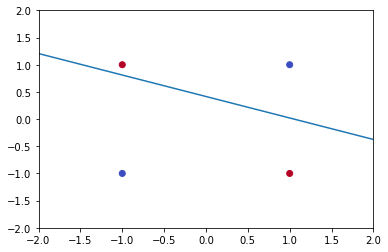

In [44]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]


network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset, epochs=1000)

plot(dataset, network)


## Ejercicio 2

In [45]:
from datasets import training_dataset_2

expected = [y[0] for x, y in training_dataset_2]

max_value = max(expected)
min_value = min(expected)

delta = (max_value - min_value)/2

normalized = []

for (x, y), v in zip(training_dataset_2, expected):
    e = (v - min_value)/delta - 1
    normalized.append((x, [e]))


### Lineal

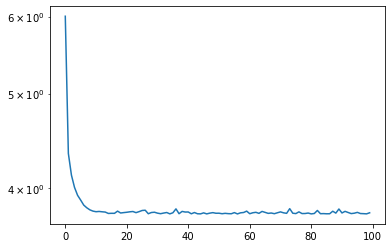

In [46]:

network = Network(structure=([3, 1]),
                  activation='lineal', seed=17, args={'b': 0.1})
errors = network.train(normalized, batch_size=1,
                       epochs=100, learning_rate=0.1, momentum=0)
plt.figure("Lineal error")
plt.yscale('log')
# plt.xscale('log')
plt.plot(errors)
plt.show()


### No lineal

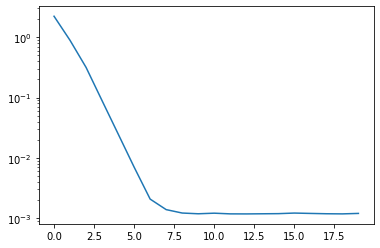

In [47]:
network = Network(structure=([3, 1]), activation='tanh', seed=17)
errors = network.train(normalized, epochs=20, learning_rate=0.01, momentum=0.3)
plt.figure("Non-lineal error")
plt.yscale('log')
plt.plot(errors)
plt.show()


## Ejercicio 3

### 3.a

In [48]:
lim = 1
size = 100
x = np.linspace(-lim, lim, size)
y = np.linspace(-lim, lim, size)
sample = [[i, j] for i in x for j in y]


def plot(network):
    img = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            img[i][j] = network.feedforward([x[i], y[j]])[0]

    plt.pcolormesh(x, y, img, vmin=-1, vmax=1,
                   shading='gouraud', cmap="coolwarm")


Error: 9.50e-02


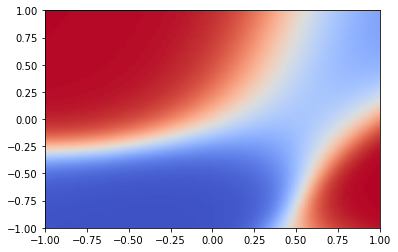

In [49]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]

network = Network(structure=(
    [2, 3, 2, 1]), activation='tanh', seed=17, args={'b': 1})
network.train(dataset, learning_rate=0.1, target_error=0.1, momentum=0.9)
print("Error: {:.2e}".format(network.error(dataset)))
plot(network)


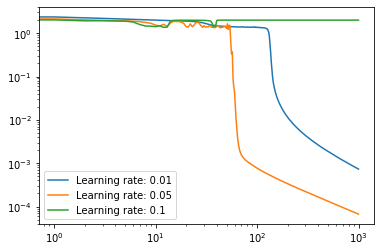

In [50]:
plt.figure("Error vs epoch")
rates = [0.01, 0.05, 0.1]
for rate in rates:
    network = Network(structure=([2, 3, 2, 1]),
                      activation='tanh', seed=17, args={'b': 1})
    errors = network.train(dataset, learning_rate=rate,
                           epochs=1000, momentum=0.9)
    plt.plot(errors, label="Learning rate: {}".format(rate))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()


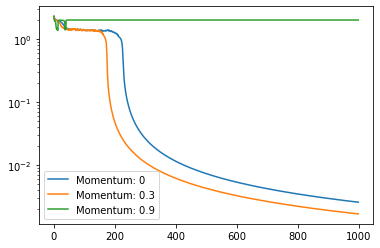

In [51]:
plt.figure("Error vs epoch - momentum")
momentums = [0, 0.3, 0.9]
for m in momentums:
    network = Network(structure=([2, 3, 2, 1]),
                      activation='tanh', seed=17, args={'b': 1})
    errors = network.train(dataset, epochs=1000, momentum=m)
    plt.plot(errors, label="Momentum: {}".format(m))
plt.legend()
plt.yscale('log')
plt.show()


### 3.b

In [52]:
from datasets import number_images

dataset = []

for i, img in enumerate(number_images):
    dataset.append((np.array(img).flatten(), [1-(2*(i % 2) - 1)]))


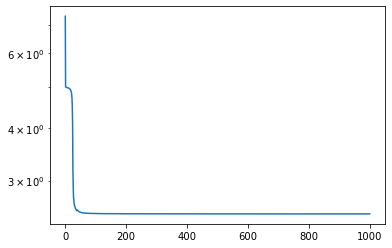

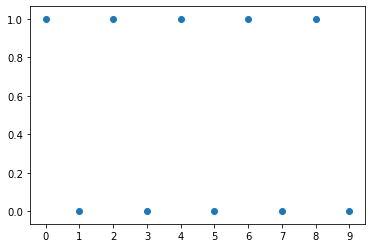

In [53]:
network = Network(structure=([35, 30, 20, 10, 5, 1]),
                  activation='tanh', seed=17, args={'b': 1})
errors = network.train(dataset, learning_rate=0.01, epochs=1000, momentum=0.9)

plt.figure("error - Par o impar")
plt.yscale('log')
plt.plot(errors)
plt.show()

x = [i for i in range(10)]
y = [network.feedforward(dataset[i][0])[0] for i in x]

plt.figure("par o impar")
plt.scatter(x, y)
plt.xticks(x)
plt.show()


### 3.c

In [54]:
from datasets import number_images

dataset = []

X = np.array([i for i in range(11)]) -0.5

for i, img in enumerate(number_images):
    dataset.append((np.array(img).flatten(), [
                   1 if j == i else 0 for j in range(10)]))


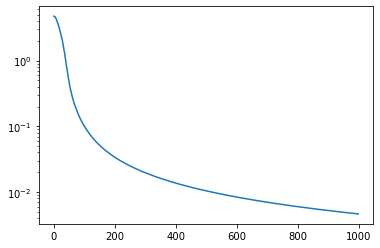

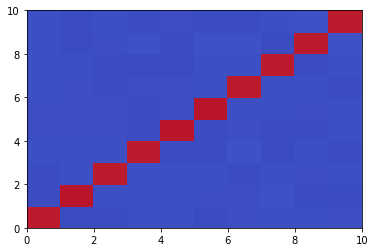

In [57]:
network = Network(structure=([35, 30, 20, 10]),
                  activation='sigmoid', seed=17, args={'b': 1})
errors = network.train(dataset, learning_rate=0.1, epochs=500, momentum=0.9)

plt.figure("error - number recon")
plt.yscale('log')
plt.plot(errors)
plt.show()

plt.figure("probability - number recon")

x = [i for i in range(10)]
matrix = []
for i in range(10):
    matrix.append(network.feedforward(dataset[i][0]))
    #plt.scatter(x,matrix[-1], label=i)
plt.pcolormesh(X,X,np.array(matrix).reshape(10, 10),
               cmap="coolwarm", vmin=0, vmax=1)

plt.show()


### Noise

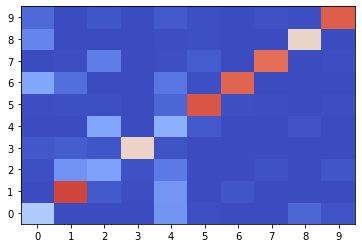

In [75]:
from utils import noise
noise_data = [[noise(img, 0.2, seed=17), output] for img, output in dataset]

plt.figure("probability - noise - number recon")

x = [i for i in range(10)]
matrix = []
for i in range(10):
    # lt.scatter(xxomatrix[-1], label=i
    matrix.append(network.feedforward(noise_data[i][0]))

plt.pcolormesh(X,X,np.array(matrix).reshape(10, 10),
               cmap="coolwarm", vmin=0, vmax=1)

plt.xticks(x)
plt.yticks(x)
plt.show()
